In [ ]:
# LOADING THE DATA AND EDA 

In [73]:
import numpy as np
import pandas as pd 
import lightgbm as lgb
import scipy as sp
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import xgboost as xgb
from xgboost import plot_importance
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from functools import partial
import statsmodels.api as sm
import shap
import os 

%matplotlib inline

In [3]:
#LOOK AND SEE WHAT THE WORKIND DRIVE IS

os.getcwd()

'C:\\Users\\acdav\\OneDrive\\Documentos\\OneDrive\\Alexjandro\\Jupyter Notebooks'

In [4]:
#CHANGE THE WORKING DRIVE TO THE ONE I WILL BE USING FOR THE ANALYSIS AND WHERE THE DATSET IS

os.chdir('C:\\Users\\acdav\\OneDrive\\Documentos\\OneDrive\\Alexjandro\\School\\Regis (2)\\MSDS 696\\data\\Project2data')

In [5]:
#CHECK TO MAKE SURE THAT THE WORKING DIRECTORY IS WHERE I NEED IT TO BE

os.getcwd()

'C:\\Users\\acdav\\OneDrive\\Documentos\\OneDrive\\Alexjandro\\School\\Regis (2)\\MSDS 696\\data\\Project2data'

In [6]:
#CREATE THE DATAFRAME WITH THE DATASET TAHT I WILL BE USING

accident = pd.read_excel('ACCIDENT.xlsx')

In [7]:
#PRINT THE DATASET AND MAKE SURE THAT IT CONTAINS WHAT I WANT TO WORK WITH 

print(accident)

       STATE  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERNOTMVIT  \
0          1    10001         2         1         1     0           0   
1          1    10002         1         1         0     0           0   
2          1    10003         2         2         0     0           0   
3          1    10004         1         1         0     0           0   
4          1    10005         2         2         0     0           0   
5          1    10006         2         1         1     1           4   
6          1    10007         1         1         0     1           1   
7          1    10008         2         2         0     1           1   
8          1    10009         1         1         0     0           0   
9          1    10010         1         1         0     1           1   
10         1    10011         3         3         0     0           0   
11         1    10012         1         1         0     0           0   
12         1    10013         3         3         0

[33654 rows x 52 columns]


In [8]:
#COMPLETE FURTHER EDA AND LOOK AT THE COLUMNS AND OBSERVATIONS THE DF HAS, THEN MAKE SURE THAT THE 
#COLUMNS ARE POPULATED AND HAVE THE CORRECT OBSERVATIONS BY LOOKING AT THE FIRST 5 ROWS OR SO

print('dimensions:', accident.shape)
accident.head()

dimensions: (33654, 52)


,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,2,1,1,0,0,1,1,121,...,99,6,15,88,88,0,0,0,1,0
1,1,10002,1,1,0,0,0,2,2,127,...,99,0,59,88,88,20,0,0,2,0
2,1,10003,2,2,0,0,0,2,2,21,...,99,23,10,99,99,0,0,0,1,0
3,1,10004,1,1,0,0,0,2,2,3,...,99,13,14,88,88,0,0,0,1,0
4,1,10005,2,2,0,0,0,2,2,73,...,99,7,28,88,88,0,0,0,1,0


In [9]:
#LOOKING AT THE SUMMARY STATISTICS OF THE DATA SET, THIS CAN HELP WITH DISTRIBUTIONS AND UNDERSTANDING OR TRENDS

accident.describe()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
count,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,...,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000
mean,27.221727,272959.565074,1.580258,1.541332,0.038926,0.231830,0.243359,2.241517,2.253046,91.763238,...,67.332442,59.749510,67.141915,73.812979,77.751798,2.151958,1.069204,0.957717,1.086349,0.256849
std,16.397000,163875.616648,0.823660,0.776784,0.302969,0.476945,0.506895,1.804314,1.809363,97.588969,...,36.303949,42.862942,36.368152,35.317922,29.735309,10.610611,9.760143,9.647763,0.359572,0.454830
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,121958.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,31.000000,...,33.000000,15.000000,33.000000,88.000000,88.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,260901.500000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,71.000000,...,98.000000,99.000000,98.000000,88.000000,88.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,42.000000,420571.750000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,115.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,56.000000,560101.000000,27.000000,27.000000,20.000000,10.000000,10.000000,47.000000,47.000000,999.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,20.000000,4.000000


In [10]:
#CREATE A BINARY VARAIBLE FOR THE CONTINUOUS OUTCOME VARAIBLE FOR THE ANALYSIS 
#THEN LOOK AT THE FIRST FEW ROWS OF THE DATASET WITH THE NEW VARIABLE TO ENSURE IT WAS CREATED CORRECTLY

accident["MultiFatal"] = (accident["FATALS"] > accident["FATALS"].median()).astype(int)
accident.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR,MultiFatal
0,1,10001,2,1,1,0,0,1,1,121,...,6,15,88,88,0,0,0,1,0,0
1,1,10002,1,1,0,0,0,2,2,127,...,0,59,88,88,20,0,0,2,0,1
2,1,10003,2,2,0,0,0,2,2,21,...,23,10,99,99,0,0,0,1,0,0
3,1,10004,1,1,0,0,0,2,2,3,...,13,14,88,88,0,0,0,1,0,0
4,1,10005,2,2,0,0,0,2,2,73,...,7,28,88,88,0,0,0,1,0,0


In [81]:
#LOOK AT SOME INITIAL STATS BEFORE GOING TOO FAR
accident["MultiFatal"].value_counts()

0    31269
1     2385
Name: MultiFatal, dtype: int64

In [11]:
#LOOKING AT THE DIMENSIONS AND THE OBSERVATION AMOUNTS FOR THE DF WITH THE NEW COLUMN CREATED
#LOOK FOR THE DATA TYPES AS WELL TO MAKE SURE THEY ARE ALL COMPATIBLE, AND WE SEE THAT NOT ALL OF THEM ARE
#SOME CONVERSIONS WILL NEED TO BE COMPLETED AND SOME VARIABLES WILL NEED TO BE DROPPED
#THEN WE LOOK FOR ANY PHYSICALLY MISSING VARIABLES 

print('dimensions:', accident.shape)
accident.info()
print (accident.isnull().values.any())

dimensions: (33654, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33654 entries, 0 to 33653
Data columns (total 53 columns):
STATE         33654 non-null int64
ST_CASE       33654 non-null int64
VE_TOTAL      33654 non-null int64
VE_FORMS      33654 non-null int64
PVH_INVL      33654 non-null int64
PEDS          33654 non-null int64
PERNOTMVIT    33654 non-null int64
PERMVIT       33654 non-null int64
PERSONS       33654 non-null int64
COUNTY        33654 non-null int64
CITY          33654 non-null int64
DAY           33654 non-null int64
MONTH         33654 non-null int64
YEAR          33654 non-null int64
DAY_WEEK      33654 non-null int64
HOUR          33654 non-null int64
MINUTE        33654 non-null int64
NHS           33654 non-null int64
RUR_URB       33654 non-null int64
FUNC_SYS      33654 non-null int64
RD_OWNER      33654 non-null int64
ROUTE         33654 non-null int64
TWAY_ID       33654 non-null object
TWAY_ID2      9190 non-null object
MILEPT        33654 non-nu

In [12]:
#WE WILL CHANGE THE DATATYPE OF THE OUTCOME VARAIBLES TO A INT64 LIKE THE REST OF THE VARAIBLES INCLUDED
#THEN WE PRINT TO MAKE SURE IT HAPPENED

accident['MultiFatal'] = (accident['MultiFatal']).astype(np.int64)
print(accident.MultiFatal.dtypes)

int64


In [13]:
#WE SEE THAT ONE OF THE VARIABLES ABOVE IS PHYSICALLY MISSING OBSERVATIONS AND WILL MOST LIKELY BE DELETED
#WE WILL LOOK FOR PHYSICALLY MISSING OBSERVATIONS AS WELL FOR THE REST OF THE DF 

print (accident.isnull().sum())

STATE             0
ST_CASE           0
VE_TOTAL          0
VE_FORMS          0
PVH_INVL          0
PEDS              0
PERNOTMVIT        0
PERMVIT           0
PERSONS           0
COUNTY            0
CITY              0
DAY               0
MONTH             0
YEAR              0
DAY_WEEK          0
HOUR              0
MINUTE            0
NHS               0
RUR_URB           0
FUNC_SYS          0
RD_OWNER          0
ROUTE             0
TWAY_ID           0
TWAY_ID2      24464
MILEPT            0
LATITUDE          0
LONGITUD          0
SP_JUR            0
HARM_EV           0
MAN_COLL          0
RELJCT1           0
RELJCT2           0
TYP_INT           0
WRK_ZONE          0
REL_ROAD          0
LGT_COND          0
WEATHER1          0
WEATHER2          0
WEATHER           0
SCH_BUS           0
RAIL              0
NOT_HOUR          0
NOT_MIN           0
ARR_HOUR          0
ARR_MIN           0
HOSP_HR           0
HOSP_MN           0
CF1               0
CF2               0
CF3               0


In [14]:
#WE WILL DROP THE VARIABLE WITH PHYSICALLY MISSING DATA SINCE IT IS NOT VITAL TO THE ANALYSIS AND WE WILL ALSO
#DROP THE OTHER VARAIBLES THAT ARE REDUNDANT, NONESSENTIAL, OR UNNECESSARY TO THE ANALYSIS AND CREATE A NEW DF 

accident22 = accident.drop(['STATE','ST_CASE','DAY','VE_FORMS','PEDS','PERSONS','CITY','YEAR','MILEPT','TWAY_ID','CF3',
                           'TWAY_ID2','HOUR','LATITUDE','LONGITUD','NOT_HOUR','NOT_MIN','ARR_HOUR','ARR_MIN','CF1','CF2',
                           'HARM_EV','COUNTY','MINUTE','RELJCT1','WEATHER1','WEATHER2','HOSP_HR','HOSP_MN','RAIL'],axis=1)

In [15]:
#ENSURE THE NEW DF HAS ALL OF THE VALUES WE WANT AND MAKE SURE THE DIMENSIONS AND DATA TYPES ARE AS WE NEED THEM TO BE

accident22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33654 entries, 0 to 33653
Data columns (total 23 columns):
VE_TOTAL      33654 non-null int64
PVH_INVL      33654 non-null int64
PERNOTMVIT    33654 non-null int64
PERMVIT       33654 non-null int64
MONTH         33654 non-null int64
DAY_WEEK      33654 non-null int64
NHS           33654 non-null int64
RUR_URB       33654 non-null int64
FUNC_SYS      33654 non-null int64
RD_OWNER      33654 non-null int64
ROUTE         33654 non-null int64
SP_JUR        33654 non-null int64
MAN_COLL      33654 non-null int64
RELJCT2       33654 non-null int64
TYP_INT       33654 non-null int64
WRK_ZONE      33654 non-null int64
REL_ROAD      33654 non-null int64
LGT_COND      33654 non-null int64
WEATHER       33654 non-null int64
SCH_BUS       33654 non-null int64
FATALS        33654 non-null int64
DRUNK_DR      33654 non-null int64
MultiFatal    33654 non-null int64
dtypes: int64(23)
memory usage: 5.9 MB


In [16]:
#WE WANT TO CHECK FOR ANY PHYSICALLY MISSING VARAIBLES IN ANY COLUMN 

print (accident22.isnull().sum())

VE_TOTAL      0
PVH_INVL      0
PERNOTMVIT    0
PERMVIT       0
MONTH         0
DAY_WEEK      0
NHS           0
RUR_URB       0
FUNC_SYS      0
RD_OWNER      0
ROUTE         0
SP_JUR        0
MAN_COLL      0
RELJCT2       0
TYP_INT       0
WRK_ZONE      0
REL_ROAD      0
LGT_COND      0
WEATHER       0
SCH_BUS       0
FATALS        0
DRUNK_DR      0
MultiFatal    0
dtype: int64


In [17]:
#WE NEED TO CREATE THE DUMMIES OF ALL OF THE NUMERIC CATEGORICAL COLUMNS THAT ARE NOT ORDINAL
#WE WILL CREATE ANOTHER DATA FRAME TO SEPARATE THE NEW COLUMNS FROM THE ORIGINALS AS TO NOT
#OVERWRITE OUR STARTING DATA LIKE WE DID WITH THE 2ND ITERATION OF THE DATASET

accident23 = accident22.copy()
accident23 = pd.get_dummies(accident23, columns=['DAY_WEEK','ROUTE','RUR_URB','FUNC_SYS',
                                               'RD_OWNER','SP_JUR','MAN_COLL','RELJCT2',
                                               'MONTH','TYP_INT','REL_ROAD','WRK_ZONE',
                                               'LGT_COND','WEATHER'], prefix=['DAY_WEEK',
                                               'ROUTE','RUR_URB','FUNC_SYS',
                                               'RD_OWNER','SP_JUR','MAN_COLL','RELJCT2',
                                               'MONTH','TYP_INT','REL_ROAD','WRK_ZONE',
                                               'LGT_COND','WEATHER'])

#WE THEN LOOK AT THE HEADS AND THE INFO OF THE DATA TO SEE IF THEY WERE ALL CREATED AND IF EVERYTHING
#THAT NEEDED TO BE CREATED WAS

print(accident23.head())
print(accident23.tail())
accident23.info()

   VE_TOTAL  PVH_INVL  PERNOTMVIT  PERMVIT  NHS  SCH_BUS  FATALS  DRUNK_DR  \
0         2         1           0        1    1        0       1         0   
1         1         0           0        2    1        0       2         0   
2         2         0           0        2    1        0       1         0   
3         1         0           0        2    1        0       1         0   
4         2         0           0        2    1        0       1         0   

   MultiFatal  DAY_WEEK_1     ...      WEATHER_4  WEATHER_5  WEATHER_6  \
0           0           0     ...              0          0          0   
1           1           0     ...              0          0          0   
2           0           0     ...              0          0          0   
3           0           0     ...              0          0          0   
4           0           0     ...              0          0          0   

   WEATHER_7  WEATHER_8  WEATHER_10  WEATHER_11  WEATHER_12  WEATHER_98  \
0          

In [18]:
#AGAIN WE SEE THAT THERE ARE NO PHYSICALLY MISSING VARIABLES AFTER THE NEW DATASET IS MADE EITHER

print (accident23.isnull().sum())

VE_TOTAL       0
PVH_INVL       0
PERNOTMVIT     0
PERMVIT        0
NHS            0
SCH_BUS        0
FATALS         0
DRUNK_DR       0
MultiFatal     0
DAY_WEEK_1     0
DAY_WEEK_2     0
DAY_WEEK_3     0
DAY_WEEK_4     0
DAY_WEEK_5     0
DAY_WEEK_6     0
DAY_WEEK_7     0
ROUTE_1        0
ROUTE_2        0
ROUTE_3        0
ROUTE_4        0
ROUTE_5        0
ROUTE_6        0
ROUTE_7        0
ROUTE_8        0
ROUTE_9        0
RUR_URB_1      0
RUR_URB_2      0
RUR_URB_6      0
RUR_URB_8      0
RUR_URB_9      0
              ..
REL_ROAD_12    0
REL_ROAD_98    0
REL_ROAD_99    0
WRK_ZONE_0     0
WRK_ZONE_1     0
WRK_ZONE_2     0
WRK_ZONE_3     0
WRK_ZONE_4     0
LGT_COND_1     0
LGT_COND_2     0
LGT_COND_3     0
LGT_COND_4     0
LGT_COND_5     0
LGT_COND_6     0
LGT_COND_7     0
LGT_COND_8     0
LGT_COND_9     0
WEATHER_1      0
WEATHER_2      0
WEATHER_3      0
WEATHER_4      0
WEATHER_5      0
WEATHER_6      0
WEATHER_7      0
WEATHER_8      0
WEATHER_10     0
WEATHER_11     0
WEATHER_12    

In [19]:
#THIS HELPS TO IDENTIFY ALL OF THE PRESENT NEW DUMMIES CREATED 
#AND ALLOWS FOR IDENTIFICATION OF THE UNKNOWN AND NOT REPORTED COLUMNS
#COLUMNS 8,9,98,AND 99 ARE THE ONES THAT NEED TO BE DROPPED AND WE KNOW THIS
#FROM THE USERS MANUAL OF THE DATA THAT TELLS US THESE VALUES ARE MISSING 

filter_col = [col for col in accident23 if col.startswith('LGT_COND')]
filter_col

['LGT_COND_1',
 'LGT_COND_2',
 'LGT_COND_3',
 'LGT_COND_4',
 'LGT_COND_5',
 'LGT_COND_6',
 'LGT_COND_7',
 'LGT_COND_8',
 'LGT_COND_9']

In [20]:
#WE WILL NOW DROP ALL OF THE COLUMNS THAT CONTAIN THE MISSING VALUES
#THIS ALLOWS FOR THE MISSING VARIABLES TO SYSTEMATICALLY BE TAKEN OUT OF THE EQUATION 
#WE WILL CREATE A 4TH DF TO HOUSE THE FINAL VARIABLES FOR THE ANALYSIS

accident24 = accident23.drop(['FATALS','WEATHER_98','WEATHER_99','ROUTE_9','RUR_URB_8','RUR_URB_9','RUR_URB_6',
               'FATALS','FUNC_SYS_98','FUNC_SYS_99','RD_OWNER_96','RD_OWNER_98','RD_OWNER_99','SP_JUR_9',
               'MAN_COLL_98','MAN_COLL_99','RELJCT2_98','RELJCT2_99','TYP_INT_98','TYP_INT_99',
               'REL_ROAD_98','REL_ROAD_99','LGT_COND_8','LGT_COND_9'],axis=1)


In [21]:
#LOOK AT THE SUMMARY STATS, INFO, DATA TYPES, AND MISSING VARIABLES/OBSERVATIONS AGAIN TO MAKE SURE THE DF IS 
#READY FOR TO BUILD THE MODELS AND MOVE FORWARD WITH THE ANALYSIS 

accident24.describe()

,VE_TOTAL,PVH_INVL,PERNOTMVIT,PERMVIT,NHS,SCH_BUS,DRUNK_DR,MultiFatal,DAY_WEEK_1,DAY_WEEK_2,...,WEATHER_2,WEATHER_3,WEATHER_4,WEATHER_5,WEATHER_6,WEATHER_7,WEATHER_8,WEATHER_10,WEATHER_11,WEATHER_12
count,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,...,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.00000,33654.000000,33654.000000
mean,1.580258,0.038926,0.243359,2.241517,0.550841,0.003061,0.256849,0.070868,0.150146,0.135615,...,0.081862,0.001902,0.011618,0.010816,0.001575,0.000297,0.001189,0.14548,0.000951,0.000743
std,0.823660,0.302969,0.506895,1.804314,1.233051,0.055238,0.454830,0.256608,0.357219,0.342385,...,0.274159,0.043568,0.107162,0.103437,0.039654,0.017235,0.034456,0.35259,0.030822,0.027246
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,27.000000,20.000000,10.000000,47.000000,9.000000,1.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
#LOOK AT THE SUMMARY STATS, INFO, DATA TYPES, AND MISSING VARIABLES/OBSERVATIONS AGAIN TO MAKE SURE THE DF IS 
#READY FOR TO BUILD THE MODELS AND MOVE FORWARD WITH THE ANALYSIS 

accident24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33654 entries, 0 to 33653
Columns: 137 entries, VE_TOTAL to WEATHER_12
dtypes: int64(8), uint8(129)
memory usage: 6.2 MB


In [23]:
#AGAIN WE SEE THAT THERE ARE NO PHYSICALLY MISSING VARIABLES AFTER THE NEW DATASET IS MADE EITHER

print (accident24.isnull().sum())
print (accident24.isnull().values.any())

VE_TOTAL       0
PVH_INVL       0
PERNOTMVIT     0
PERMVIT        0
NHS            0
SCH_BUS        0
DRUNK_DR       0
MultiFatal     0
DAY_WEEK_1     0
DAY_WEEK_2     0
DAY_WEEK_3     0
DAY_WEEK_4     0
DAY_WEEK_5     0
DAY_WEEK_6     0
DAY_WEEK_7     0
ROUTE_1        0
ROUTE_2        0
ROUTE_3        0
ROUTE_4        0
ROUTE_5        0
ROUTE_6        0
ROUTE_7        0
ROUTE_8        0
RUR_URB_1      0
RUR_URB_2      0
FUNC_SYS_1     0
FUNC_SYS_2     0
FUNC_SYS_3     0
FUNC_SYS_4     0
FUNC_SYS_5     0
              ..
REL_ROAD_5     0
REL_ROAD_6     0
REL_ROAD_7     0
REL_ROAD_8     0
REL_ROAD_10    0
REL_ROAD_11    0
REL_ROAD_12    0
WRK_ZONE_0     0
WRK_ZONE_1     0
WRK_ZONE_2     0
WRK_ZONE_3     0
WRK_ZONE_4     0
LGT_COND_1     0
LGT_COND_2     0
LGT_COND_3     0
LGT_COND_4     0
LGT_COND_5     0
LGT_COND_6     0
LGT_COND_7     0
WEATHER_1      0
WEATHER_2      0
WEATHER_3      0
WEATHER_4      0
WEATHER_5      0
WEATHER_6      0
WEATHER_7      0
WEATHER_8      0
WEATHER_10    

In [24]:
#CREATE ANOTHER DATASET WITHOUT THE OUTCOME VARAIBLES TO CREATE THE EXPLANATORY VALUES FOR THE TRAIN AND TEST DATASETS

accident25 = accident24.drop('MultiFatal',axis=1)

In [25]:
#CHECK TO MAKE SURE THE OUTCOME VARAIBLE IS GONE AND WE ARE ONLY LEFT WITH THE EXPLANATORY VARAIBLES

accident25.describe()

,VE_TOTAL,PVH_INVL,PERNOTMVIT,PERMVIT,NHS,SCH_BUS,DRUNK_DR,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,...,WEATHER_2,WEATHER_3,WEATHER_4,WEATHER_5,WEATHER_6,WEATHER_7,WEATHER_8,WEATHER_10,WEATHER_11,WEATHER_12
count,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,...,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.000000,33654.00000,33654.000000,33654.000000
mean,1.580258,0.038926,0.243359,2.241517,0.550841,0.003061,0.256849,0.150146,0.135615,0.127474,...,0.081862,0.001902,0.011618,0.010816,0.001575,0.000297,0.001189,0.14548,0.000951,0.000743
std,0.823660,0.302969,0.506895,1.804314,1.233051,0.055238,0.454830,0.357219,0.342385,0.333508,...,0.274159,0.043568,0.107162,0.103437,0.039654,0.017235,0.034456,0.35259,0.030822,0.027246
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,27.000000,20.000000,10.000000,47.000000,9.000000,1.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# CREATING THE TEST AND TRAINING SET FOR BOTH MODELS

In [26]:
#CREATE THE SEPARATED ANALYSIS SPECIFIC DATASETS SO THAT THE OUTCOME VARIABLE IS ALONE AND READY FOR THE ANALYSIS

B, a = accident25.iloc[:,:],accident24.iloc[:,7]

In [83]:
#CREATE A DMATRIX FOR THE THE CROSS-VALIDATION METHOD LATER THIS IS SO THAT THE XGBOOST CV METHOD CAN READ THAT DATA 

data_dmatrix = xgb.DMatrix(data=B,label=a)

In [28]:
#CREATE THE TEST AND THE TRAINING DATA TO USE FOR THE MODELS AND ANALYSIS

B_train, B_test, a_train, a_test = train_test_split(B, a, test_size=0.2, random_state=968)

In [41]:
#CREATE THE MODEL WITH THE HYPER PARAMETERIZATION EMBEDED IN THE CLASSIFIER FUNCTION 

xg_class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.02,
                scale_pos_weight=1, reg_alpha = 0.2, gamma=0, max_depth = 4, n_estimators=701, 
                random_state=921, min_child_weight=3, subsample = 0.95, early_stopping_rounds=50)

In [42]:
#PARAMETER TUNING AND HYPER PARAMETERIZATION CONTINUED... WE ARE TRYING TO EVALUATE AND TWEEK 
#THE PARAMETERS TO SEE WHICH MODEL COMES OUT THE BEST FROM SELECTED PARAMETERS
#THEN WE WILL MOVE THE PARAMETERS TO A CV AND TEST/TRAIN MODELS AND EVALUATE THE RESULTS FURTHER

eval_set = [(B_train, a_train), (B_test, a_test)]
eval_metric = ["auc","error"]
%time xg_class.fit(B_train, a_train, eval_metric=eval_metric, eval_set=eval_set, verbose=50)

[0]	validation_0-auc:0.67806	validation_0-error:0.071203	validation_1-auc:0.688647	validation_1-error:0.069529
[50]	validation_0-auc:0.856155	validation_0-error:0.071203	validation_1-auc:0.839331	validation_1-error:0.069529
[100]	validation_0-auc:0.878747	validation_0-error:0.071203	validation_1-auc:0.851086	validation_1-error:0.069529
[150]	validation_0-auc:0.888855	validation_0-error:0.071203	validation_1-auc:0.850166	validation_1-error:0.069529
[200]	validation_0-auc:0.901273	validation_0-error:0.07098	validation_1-auc:0.853063	validation_1-error:0.069529
[250]	validation_0-auc:0.913196	validation_0-error:0.070794	validation_1-auc:0.855315	validation_1-error:0.069529
[300]	validation_0-auc:0.923408	validation_0-error:0.069866	validation_1-auc:0.856425	validation_1-error:0.069678
[350]	validation_0-auc:0.931275	validation_0-error:0.0689	validation_1-auc:0.857546	validation_1-error:0.069975
[400]	validation_0-auc:0.93729	validation_0-error:0.067563	validation_1-auc:0.857688	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, early_stopping_rounds=50,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=20,
       min_child_weight=3, missing=None, n_estimators=1201, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=921,
       reg_alpha=1.1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.95, verbosity=1)

In [291]:
#FIT THE MODEL

xg_class.fit(B_train,a_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, early_stopping_rounds=50,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=4,
       min_child_weight=3, missing=None, n_estimators=701, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=921,
       reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.95, verbosity=1)

In [292]:
#THEN DO THE PREDICTIONS 

preds_train = xg_class.predict(B_train)

In [293]:
preds_test = xg_class.predict(B_test)

In [294]:
predprob_test = xg_class.predict_proba(B_test)[:, 1]

In [295]:
predprob_train = xg_class.predict_proba(B_train)[:, 1]

In [296]:
#ONCE WE RUN OUR PREDICTIONS WE HAVE TO CONVERT OUR PREDICTIONS TO BINARY FORMAT TO BE READ
#THIS CODE WILL MAKE SURE WE ROUND OUR PROBABILITIES THAT COME BY DEFAULT TO SOMETHING READABLE

predictions_train = [round(value) for value in preds_train]

In [297]:
predictions_test = [round(value) for value in preds_test]

In [298]:
#NOW WE WILL EVALUATE THE TRAINING PREDICATION BY USING ACCURACY OF THE MODEL
#WE WILL COMPARE THE PREDICTED OUTCOMES TO THE EXPECTED ONES 

accuracy_train = accuracy_score(a_train, predictions_train)
print("Accuracy: %.2f%%" % (accuracy_train * 100.0))

Accuracy: 92.95%


In [299]:
#NOW WE WILL EVALUATE THE TEST PREDICATION BY USING ACCURACY OF THE MODEL
#WE WILL COMPARE THE PREDICTED OUTCOMES TO THE EXPECTED ONES 

accuracy = accuracy_score(a_test, predictions_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.93%


In [300]:
#WE WILL LOOK AT THE TRAINING AUC FOR THE MODEL NOW 
#AS WELL BASED ON THE ABOVE CALCULATED VALUES

print ('ROC AUC Score',roc_auc_score(a_train,predprob_train))

ROC AUC Score 0.8868560538689286


In [301]:
#WE WILL LOOK AT THE TEST AUC FOR THE MODEL NOW 
#AS WELL BASED ON THE ABOVE CALCULATED VALUES

print ('ROC AUC Score',roc_auc_score(a_test,predprob_test))

ROC AUC Score 0.864747308504294


In [302]:
#SECOND LOOK AT ACCURACY USING A LOGISTIC REGRESSION METHOD, THIS WAS ANOTHER CROSS VALIDATION METHOD 
#BUT THE RESULT CAME OUT LOWER THAN THE PREVIOUS METHOD WITH THE TRAINING DATA

lr = LogisticRegression()
np.mean(cross_val_score(lr,B_train,a_train,cv=10,scoring="accuracy"))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages

0.9263080463183269

In [318]:
#NOW WE WILL NOW COMPLETE A CROSS VALIDATION SET AS WELL
#THIS IS THE GOLD STANDARD FOR ML EVALUATION AND WE WANT TO 
#MAKE SURE THAT OUR MODEL HOLD AND WE GET THE BEST RESULTS 
#WE GET THE BEST RESULTS FROM A MORE ROBUST MODEL PLATFORM

params = {"objective":"binary:logistic",'colsample_bytree': 0.3, 'learning_rate': 0.02,
                'scale_pos_weight':1, 'reg_alpha': 0.2, 'gamma':0, 'max_depth': 4,
                'min_child_weight':3, 'subsample': 0.95}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=701,early_stopping_rounds=50, metrics="auc", as_pandas=True, seed=8647)

In [332]:
#LOOK AT THE BEST AUC MEAN AND STD ERROR AS THEY INCREASE, 
#THE BEST ITERATION WILL BE THE LAST BECAUSE OF HOW WE HAVE IT ORDERED

print('Area Under the Curve (AUC): ',cv_results)

Area Under the Curve (AUC):       train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.716516       0.003907       0.710231      0.012712
1          0.747325       0.050623       0.740471      0.043591
2          0.762597       0.050523       0.757515      0.046765
3          0.777471       0.047893       0.771371      0.045551
4          0.787371       0.044296       0.780769      0.039815
5          0.790950       0.046246       0.783144      0.042990
6          0.805435       0.037041       0.796586      0.033343
7          0.811488       0.030926       0.803955      0.023479
8          0.816980       0.031344       0.809546      0.024702
9          0.822984       0.023117       0.815884      0.021227
10         0.822694       0.021032       0.814900      0.021908
11         0.822321       0.021200       0.814520      0.021491
12         0.823784       0.022776       0.816421      0.022720
13         0.825870       0.021076       0.818381      0.018215
14         

In [333]:
#LOOK AT THE OVERALL MODEL TEST AUC

AUC = cv_results['test-auc-mean'].max()
AUC

0.8629737000000001

In [334]:
#LOOK AT THE AMOUNT OF ROUNDS IT TOOK TO GET TO THE BEST AUC

boost_rounds = cv_results['test-auc-mean'].idxmax()
boost_rounds

698

In [130]:
#FEATURE IMPORTANCE BY GAIN SCORE 

f = 'total_gain'
modelimp = xg_class.get_booster().get_score(importance_type = f)
modelimp

{'MAN_COLL_0': 3951.640036764229,
 'RUR_URB_2': 2286.3156267752256,
 'DRUNK_DR': 2763.95526813799,
 'SP_JUR_3': 404.7653569584499,
 'REL_ROAD_4': 2482.746409245549,
 'VE_TOTAL': 7431.634362026873,
 'RELJCT2_2': 1038.3009175739671,
 'ROUTE_6': 780.223993279515,
 'RELJCT2_6': 627.7288210950998,
 'RELJCT2_1': 2633.7411620202897,
 'RD_OWNER_4': 645.2291344856973,
 'DAY_WEEK_1': 1528.456983605186,
 'MAN_COLL_6': 2143.391768653071,
 'TYP_INT_1': 1521.7640950173022,
 'MONTH_4': 848.4230764148361,
 'WRK_ZONE_0': 294.2887862119199,
 'PVH_INVL': 833.1213122742399,
 'MAN_COLL_2': 5439.265693737897,
 'PERNOTMVIT': 11848.314331873506,
 'LGT_COND_1': 2570.121333084738,
 'RUR_URB_1': 2729.3052579892137,
 'FUNC_SYS_5': 955.8497087826265,
 'LGT_COND_2': 1934.1940174986216,
 'MONTH_6': 1024.0890189078173,
 'ROUTE_2': 1412.440838740088,
 'ROUTE_1': 1291.1321554882707,
 'DAY_WEEK_7': 1414.4451303807402,
 'PERMVIT': 46924.31268750006,
 'REL_ROAD_1': 4696.039835562373,
 'MAN_COLL_1': 1290.7722757220085,
 'S

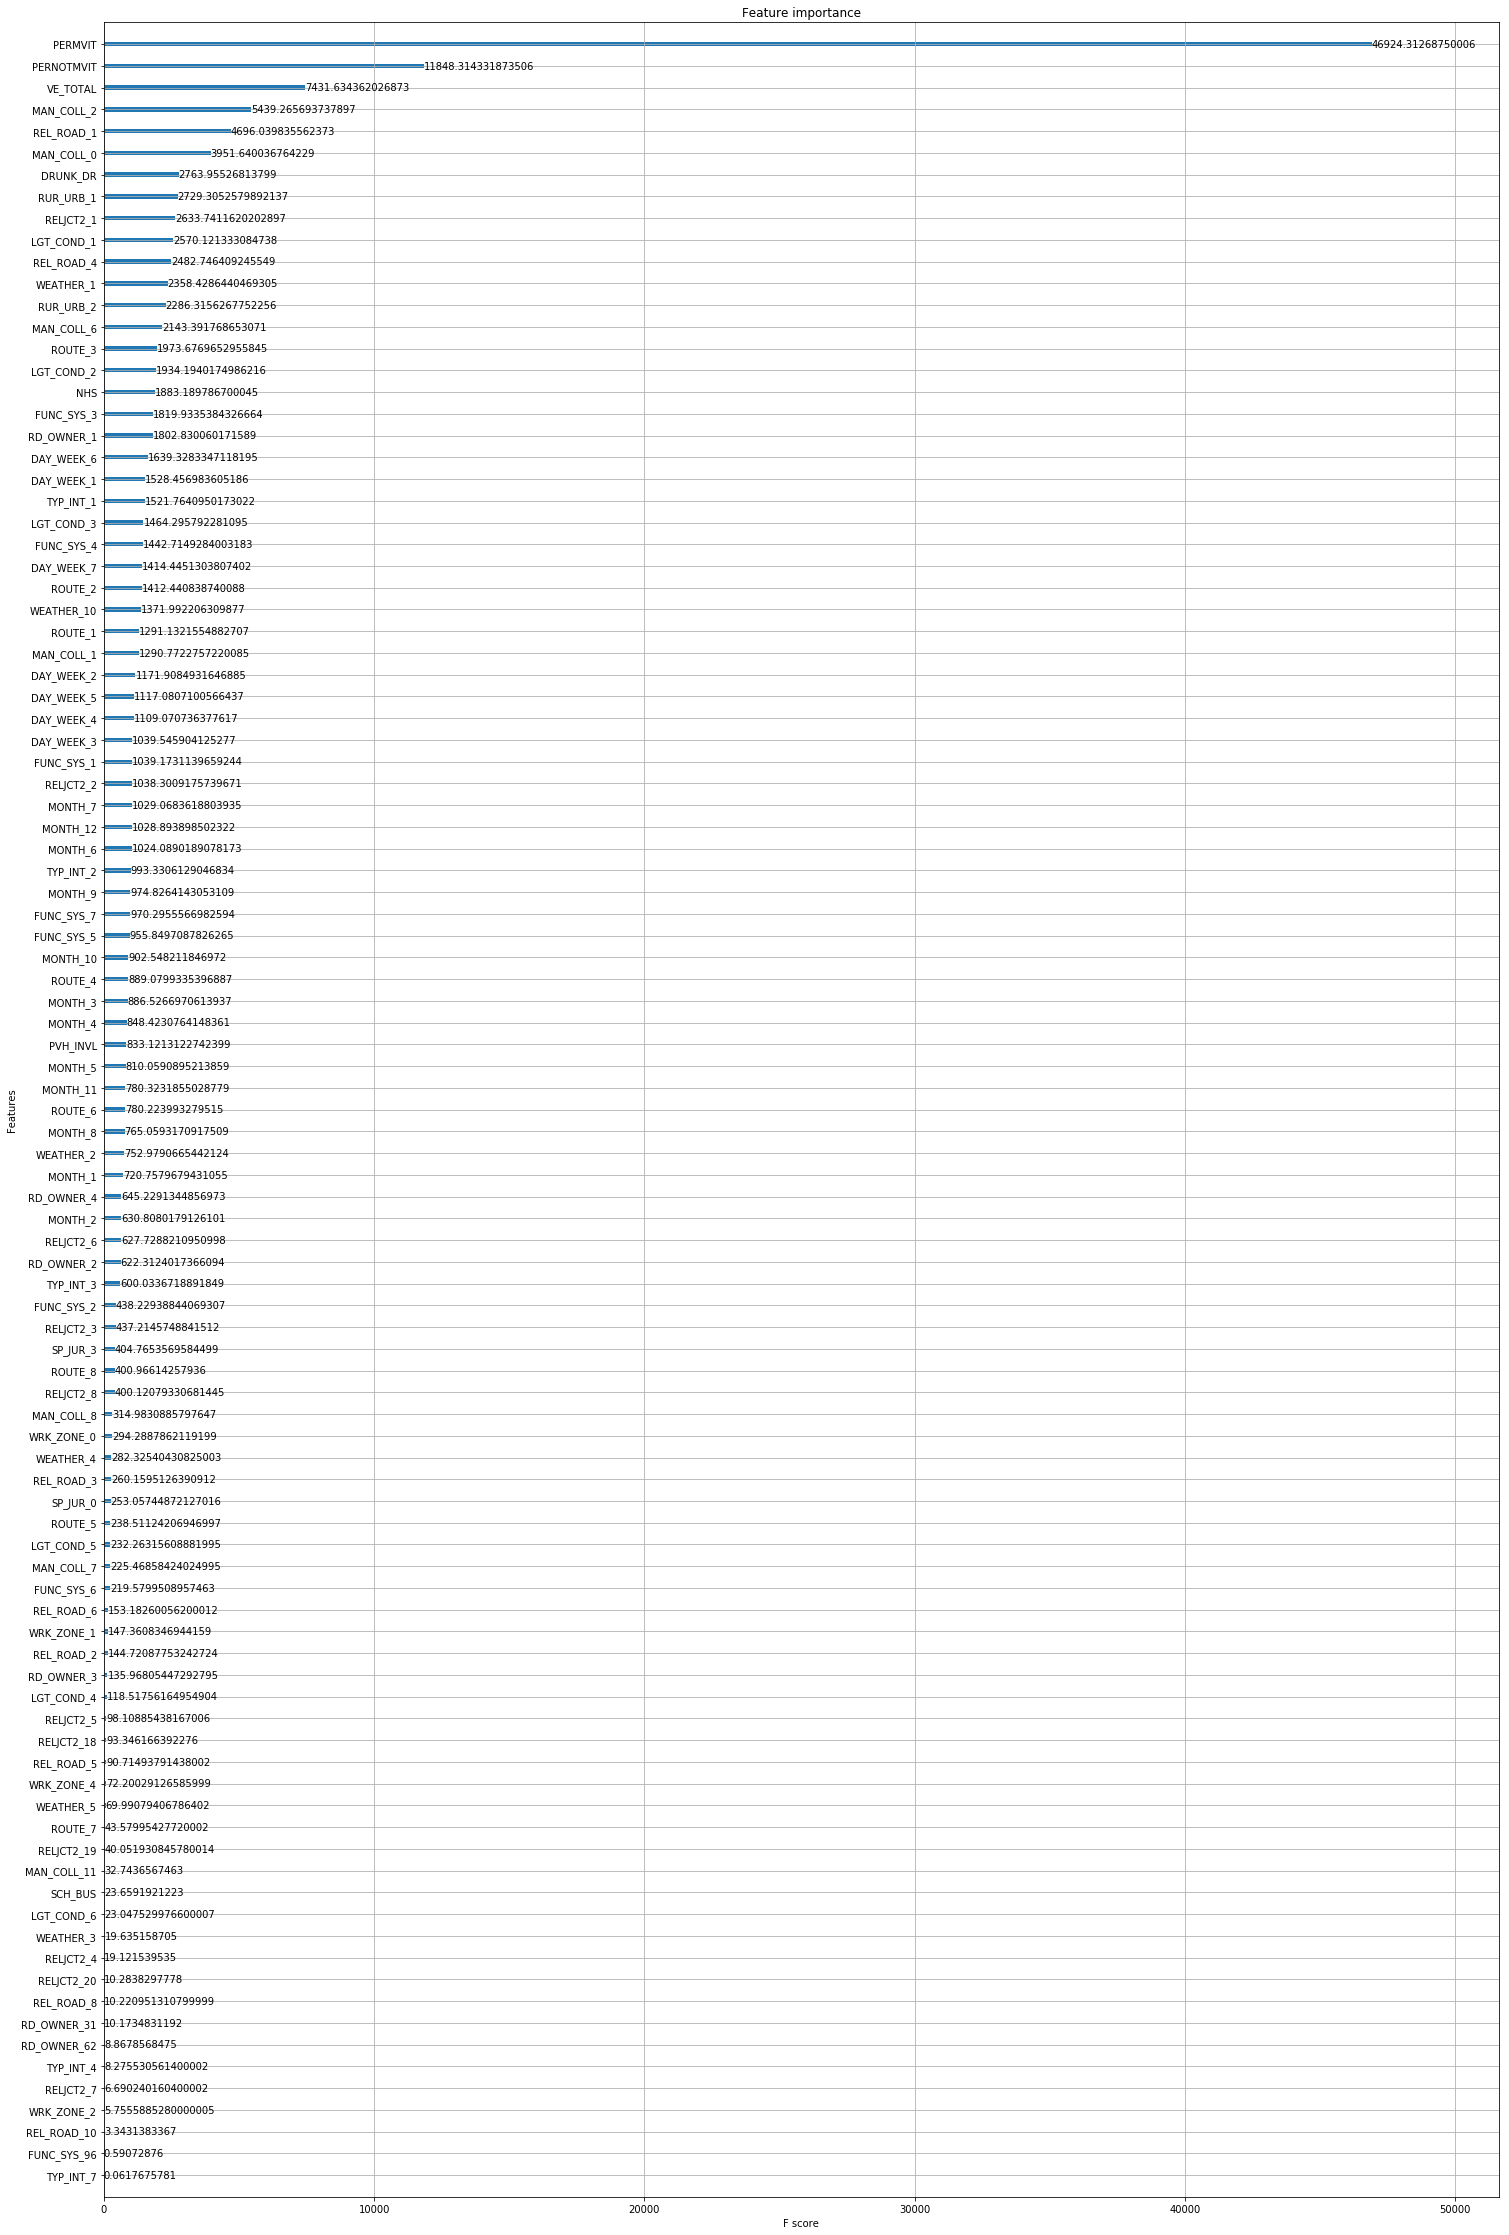

In [121]:
#CREATE THE CHARTS WITH THE DATA LABELS TO THEN EXTRACT THE MOST IMPORTANT VARIABLES

#LOOKING AT THE MATPLOTLIB FEATURE IMPORTANCE CHART
plot_importance(xg_class, importance_type = 'total_gain')
fig = plt.gcf()
fig.set_size_inches(25,40)
fig.savefig('XGB_Model_Feature_Importance.png', dpi=200)
plt.show()


In [ ]:
#NOW THAT WE HAVE THE MOST IMPORTANT FEATURES TO THE OUTCOME OF A MULTIPLE FATALITY CRASH
#WE WILL MAKE SURE WE HAVE THE TOP 10 FROM THE IMPORTANCE CHART ABOVE AND USE THOSE IN THE 
#OVERALL LOGISTIC REGRESSION AT THE END, DEPENDING ON IF THIS MODEL IS BETTER THAN THE
#RANDOM FOREST. THE TOP 10 MOST IMPORTANT FEATURES IN THE XGBOOST MODEL ARE:

#PERMVIT, PERNOTMVIT, VE_TOTAL, MAN_COLL_2, REL_ROAD_1, MAN_COLL_0, DRUNK_DR, RUR_URB_1, RELJCT2_1, LGT_COND_1 

In [30]:
#NEXT WE WILL USE THE SAME CLEANED DATASET AND TRAININ DATA WE CREATED FOR THE XGBOOST MODEL 
#TO RUN A RANDOM FOREST MODEL AND SEE IF ITS PREDICTIONS ARE BETTER
#WE DO NOT HAVE TO DO ANYTHING EXCEPT FOR PLUG IN OUR DATA SINCE WE CREATED AND CLEANED EVERYTHING 
#FOR THE LAST MODEL. HOWEVER, WE WILL FIRST HYPER TUNE AT A MINIMUM SOME OF THE MORE IMPORTANT
#PARAMETERS SUCH AS N_ESTIMATORS, MAX_DEPTH, AND MAX_FEATURES TO RUN AN EFFICIENT MODEL.

rfc = RandomForestClassifier()

# NUMBER OF TREES TO USE

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 8000, num = 10)]

# NUMBER OF FEATURES AT EVERY SPLIT

max_features = ['auto', 'sqrt']

# MAX DEPTH OF THE TREES

max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# PUT IT ALL TOGETHER AND CREATE A RANDOM GRID

random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

In [1]:
# NEXT WE WILL RUN THE RANDOM SEARCH OF PARAMETERS 

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                                n_iter = 100, cv = 8, verbose=2, random_state=4219, n_jobs = -1)

NameError: name 'RandomizedSearchCV' is not defined

In [32]:
# THEN WE WILL FIT THE MODEL AND PRINT THE RESULTS 

rfc_random.fit(B_train, a_train)

print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 135.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 269.4min finished


{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 420}


In [49]:
#NEXT WE WILL USE THE BEST PARAMETERS WE JUST FOUND TO GET THE BEST RF MODEL 

rfc = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=420, random_state=4209)
rfc.fit(B_train,a_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=420, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=4209, verbose=0,
            warm_start=False)

In [50]:
#NEXT THE PREDICTIONS FOR THE CONFUSION MATRIX

rf_a_pred=rfc.predict(B_test)

In [51]:
#NEXT THE PREDICTED PROBABILITIES FOR THE AUC

rf_predprob_test = rfc.predict_proba(B_test)[:, 1]

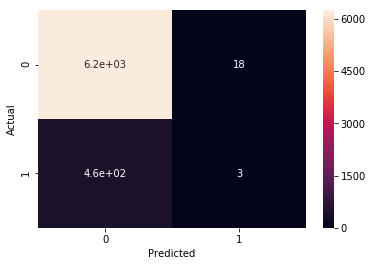

In [52]:
#NEXT WE WILL DRAW THE CONFUSION MATRIX FOR THE OUTCOMES

confusion_matrix = pd.crosstab(a_test, rf_a_pred, rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(confusion_matrix, annot=True)

In [53]:
#NEXT WE WILL PRINT THE ACCURACY TO THE MODEL TO SEE HOW IT COMPARED TO THE XGBOOST MODEL

print('Accuracy: ',accuracy_score(a_test, rf_a_pred))

Accuracy:  0.9282424602585054


In [54]:
#WE WILL ALSO LOOK AT THE AUC TO COMPARE THE MODELS SINCE LIKE BEFORE OUR 
#DISTRIBUTION IS HIGHLY SKEWED AND WILL EFFECT ACCURACY OF THE MODEL

print ('ROC AUC Score',roc_auc_score(a_test,rf_predprob_test))

ROC AUC Score 0.8417677555470945


In [55]:
#NEXT LET LOOK AT THE FEATURE IMPORTANCE SELECTIONS OF THE RF BY CREATING A FEATURE IMPORTANCE MODEL

rfc_feature_imp = pd.Series(rfc.feature_importances_,index=B_test.columns.values).sort_values(ascending=False)
rfc_feature_imp

PERMVIT        1.356039e-01
VE_TOTAL       3.426900e-02
DRUNK_DR       2.925009e-02
WEATHER_1      2.603272e-02
DAY_WEEK_7     2.041698e-02
DAY_WEEK_6     1.987647e-02
LGT_COND_1     1.947591e-02
DAY_WEEK_1     1.929595e-02
PERNOTMVIT     1.827812e-02
LGT_COND_2     1.824130e-02
WEATHER_10     1.821730e-02
DAY_WEEK_5     1.765187e-02
RD_OWNER_1     1.759777e-02
NHS            1.753679e-02
DAY_WEEK_2     1.723300e-02
DAY_WEEK_4     1.718290e-02
ROUTE_3        1.702775e-02
DAY_WEEK_3     1.683289e-02
MONTH_7        1.622161e-02
MONTH_10       1.590122e-02
FUNC_SYS_4     1.588141e-02
FUNC_SYS_3     1.578698e-02
MONTH_6        1.576532e-02
MONTH_8        1.546887e-02
MAN_COLL_2     1.528479e-02
MONTH_9        1.514240e-02
MONTH_4        1.442018e-02
MONTH_3        1.421396e-02
MONTH_12       1.374393e-02
ROUTE_2        1.351050e-02
                   ...     
RELJCT2_4      3.047941e-04
RD_OWNER_66    2.952896e-04
WEATHER_7      2.630863e-04
SP_JUR_1       2.614983e-04
SP_JUR_4       2.466

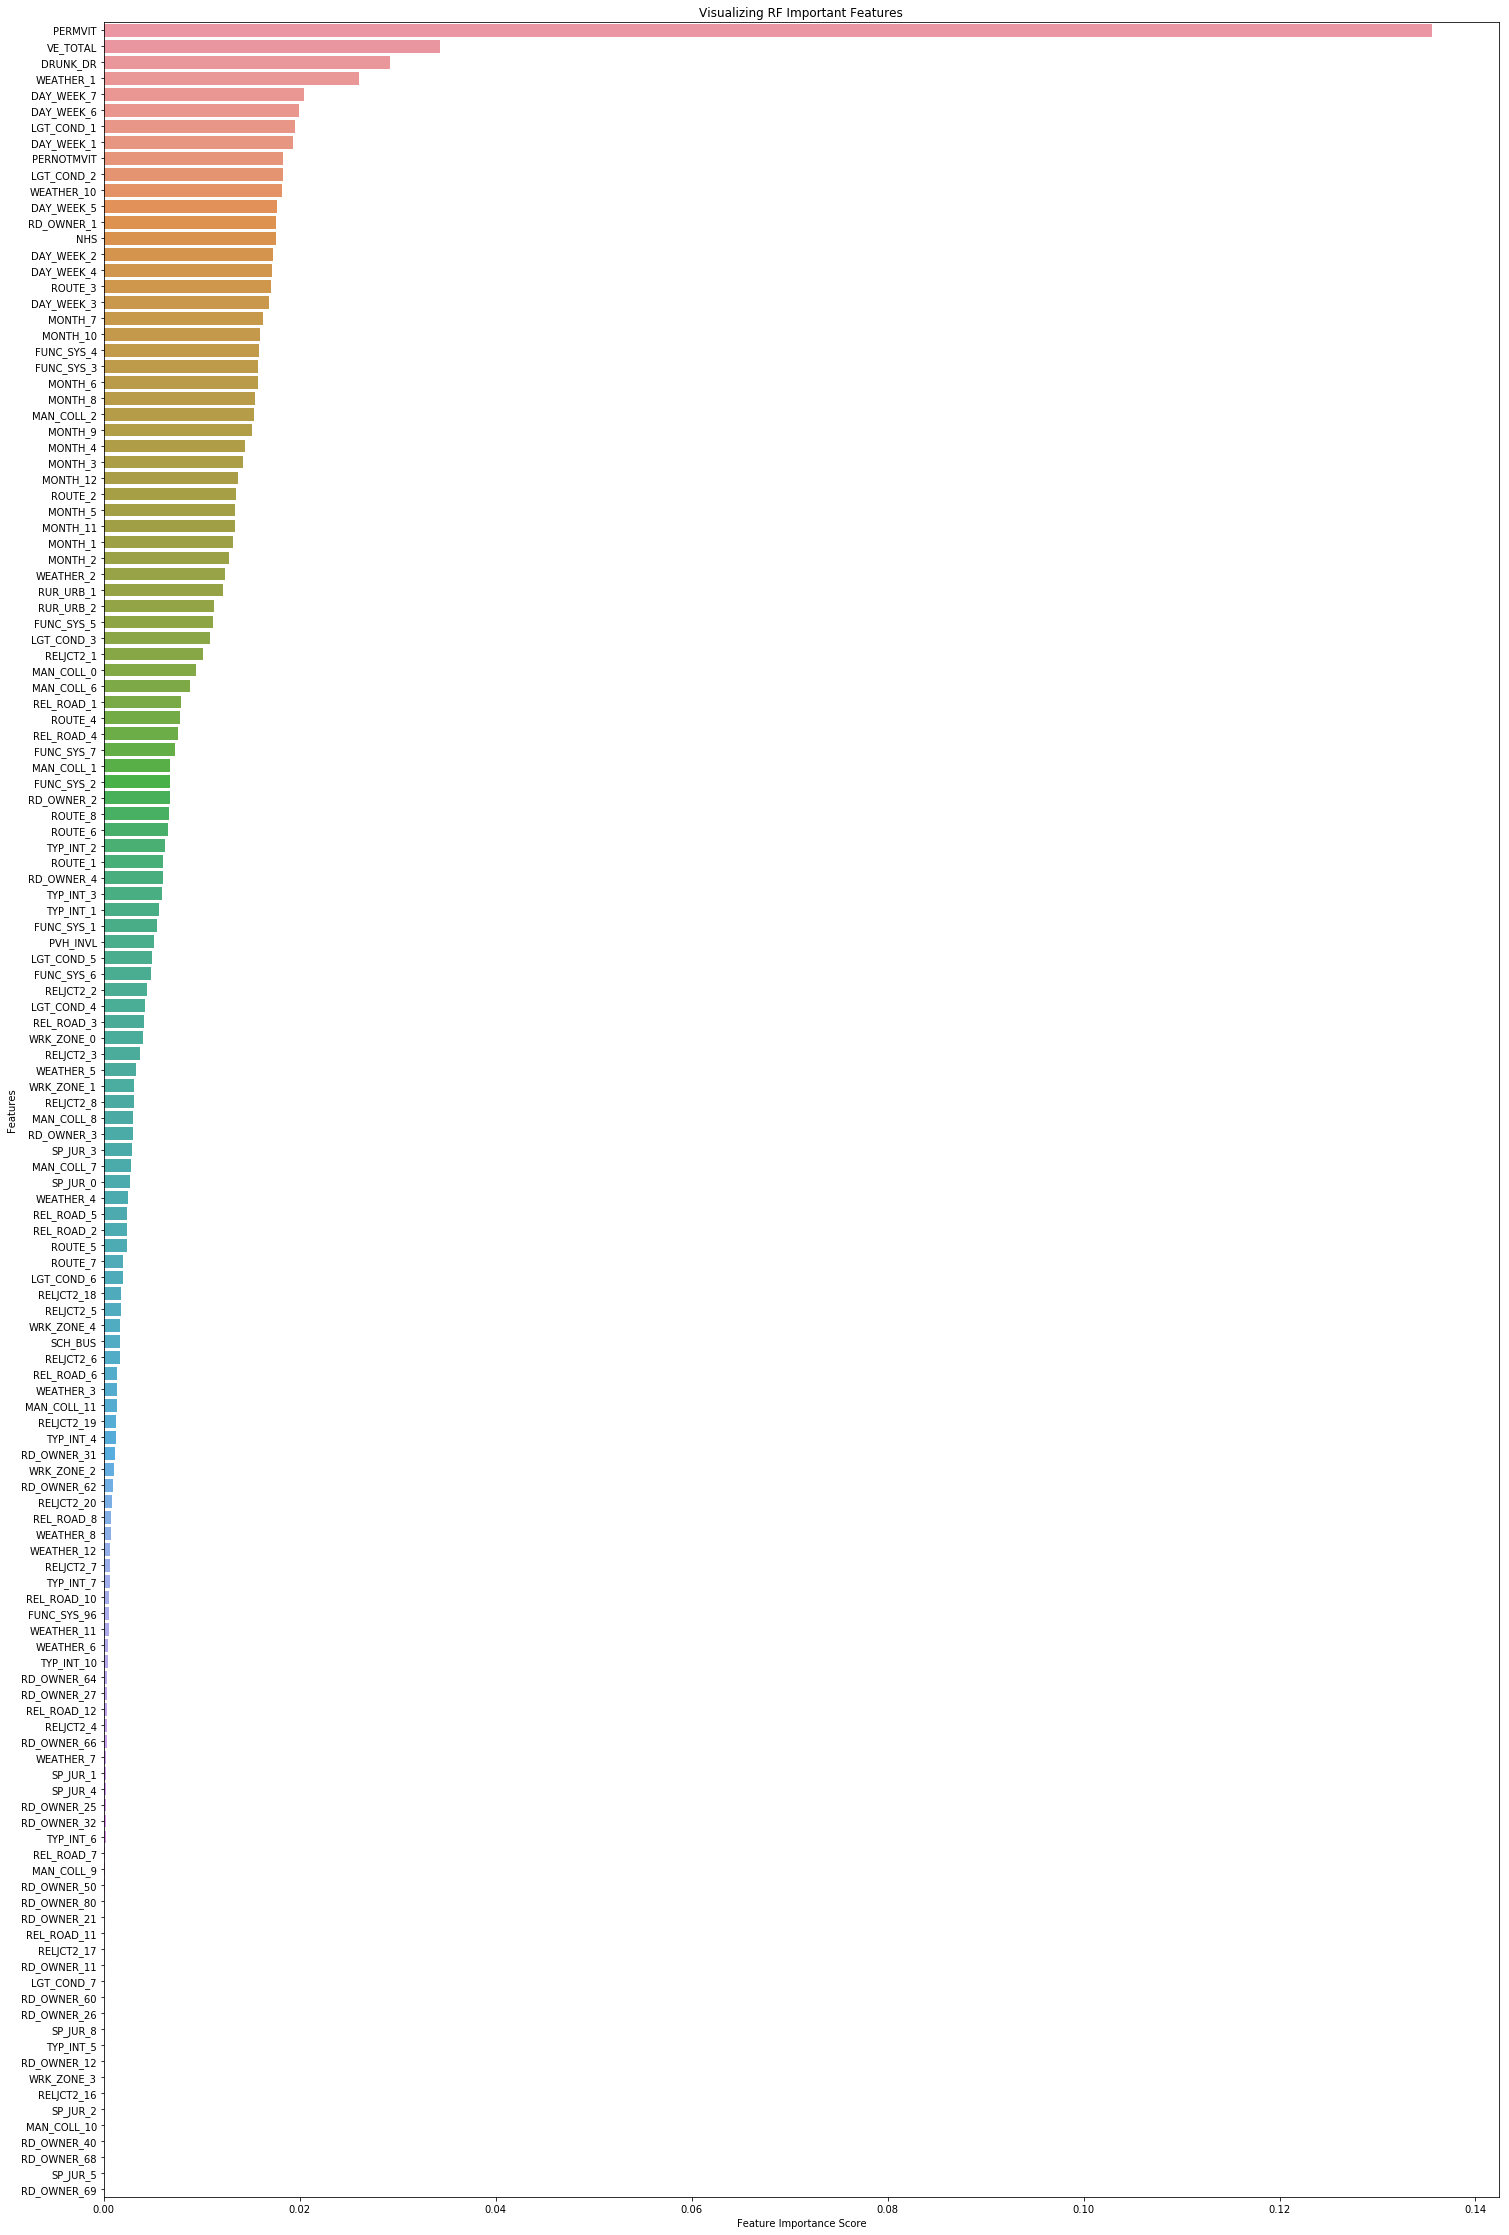

In [56]:
#NEXT LETS VISUALIZE OUR FEATURE IMPORTANCE AS WE DID ABOVE

sb.barplot(x=rfc_feature_imp, y=rfc_feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing RF Important Features")
fig = plt.gcf()
fig.set_size_inches(25,40)
plt.show()

In [ ]:
#WHILE THE TOP TEN OF THE RF ALGORITHM IS VERY RELEVANT IT IS VERY
#DIFFERENT FROM THE FEATURES CHOSEN BY XGBOOST DUE TO THE GINI METHOD 
#BEING USED TO INTERPRET THE RANDOM FOREST RESULTS
#THE TOP 10 MOST IMPORTANCE FEATURES ARE AS FOLLOWS:

#PERMVIT, VE_TOTAL, DRUNK_DR, WEATHER_1, DAY_WEEK_7, DAY_WEEK_6, LGT_COND_1, DAY_WEEK_1, PERNOTMVIT, LGT_COND_2

#WHILE THESE ARE INTERESTING RESULTS WITH ALMOST EQUAL ACCURACY, 
#WE WILL USE THE RESULTS FROM THE XGBOOST MODEL DUE TO IT HAVING THE 
#SLIGHTLY HIGHER AUC. 

# XGBOOST AUC = CROSS VALIDATION MODEL 86%(86.30%) / TRAIN &TEST MODEL 86% (86.47%)

# VS. 

# RANDOM FOREST MODEL = TRAIN & TEST MODEL/CONFUSION MATRIX 84% (84.18%)

#WE ARE CHOOSING AUC IN THIS MODEL OVER ACCURACY AS THE INFORMATIVE 
#METRIC DUE TO THE VERY LARGE SKEW OF THE OUTCOME DATA BEING 
#OVERWHELMINGLY A NON-MULTIPLE FATALITY CRASH.

#THE HIGH ACCURACIES ARE POSSIBLY ACHEIVEABLE DUE TO CHANCE AND 
#JUST PICKING THE OUTCOME AT WILL, SO USING AUC HELPS TO MITIGATE THE
#SKEW AND IMPORVE SELECTION OF THE BEST MODEL THAT GETS THE PREDICTIONS
#CORRECT.

#NEXT WE WILL RUN THE OVERALL LOGISTIC REGRESSION WITH THE TOP 10 RESULTS
#FROM THE XGBOOST MODEL TO DETERMINE IMPACTS OF THE IDENTIFIED 
#IMPORTANT FEATURES OF THE BETTER MODEL.

In [122]:
#CREATE THE LOGISTIC REGRESSION WITH STATSMODELS AND THEN INTERPRET RESULTS 

#WE WILL CREATE A SMALLER DATASET WITH ONLY THE MOST IMPORTANT FEATURES FROM
#THE XGBOOST MODEL AND THE LABEL/DEPENDENT VARAIBLE FOR THE MODEL. 
#THIS WILL MAKE THE MODEL RUN MORE EFFICIENTLY.

#ONCE THE TWO SETS ARE CREATED WE CAN RUN THE MODEL
#INITIALLY WE WANT TO RUN A MODEL WITH JUST THE INTERCEPT 
#THIS WAY WE CAN SEE THE IMPROVEMENT TO THE MODEL OUR TOP 10 FEATURES ADD 
#OR SUBTRACT FROM THE BASE MODEL

endog = a
exog = sm.add_constant(accident24.loc[:,['PERMVIT','PERNOTMVIT','VE_TOTAL','MAN_COLL_2',
         'REL_ROAD_1','MAN_COLL_0','DRUNK_DR','RUR_URB_1','RELJCT2_1','LGT_COND_1']])

LRF2 = sm.Logit(endog, exog['const'])

results_F2 = LRF2.fit()

Optimization terminated successfully.
         Current function value: 0.255879
         Iterations 7


In [123]:
#HERE WE HAVE THE RESULTS OF THE BASE MODEL THAT WE CREATED. WE WILL 
#NOW BE ABLE TO BUILD ON IT TO SEE WHAT OUR SELECTED FEATURES ADD OR TAKE AWAY

print (results_F2.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: MultiFatal       AIC:              17224.7081
Date:               2019-12-01 09:38 BIC:              17233.1320
No. Observations:   33654            Log-Likelihood:   -8611.4   
Df Model:           0                LL-Null:          -8611.4   
Df Residuals:       33653            LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
         Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const   -2.5734     0.0212   -121.1420   0.0000   -2.6151   -2.5318



In [124]:
#NEXT WE WILL RUN THE MODEL WITH THE INTERCEPT AND ALL 10 OF 
#OUR MOST IMPORTANT FEATURES THAT WERE SELECTED BY OUR XGB MODEL

LRF = sm.Logit(endog, exog)

results_F = LRF.fit()

Optimization terminated successfully.
         Current function value: 0.222256
         Iterations 8


In [125]:
#NEXT WE NEED TO READ/INTERPRET THE RESULTS FROM OUR MODEL

#WE DID GET A SIGNIFICANTLY LOWER AIC AND BIC THIS MEANS OUR
#FULL MODEL IS BETTER THAN THE BASE MODEL

print (results_F.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.131     
Dependent Variable: MultiFatal       AIC:              14981.5797
Date:               2019-12-01 09:38 BIC:              15074.2424
No. Observations:   33654            Log-Likelihood:   -7479.8   
Df Model:           10               LL-Null:          -8611.4   
Df Residuals:       33643            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -2.5323    0.1329  -19.0531  0.0000  -2.7927  -2.2718
PERMVIT       0.3916    0.0135   29.0175  0.0000   0.3651   0.4180
PERNOTMVIT    0.4497    0.0486    9.2437  0.0000   0.3543   0.5450
VE_TOTAL     -0.2491    0.0367

In [126]:
#SINCE WE SEE THAT REL_ROAD_4 IS NOT SIGNIFICANT WE WILL TRY TO TAKE IT OUT TO EVALUATE THE EFFECT ON THE MODEL

exog2 = sm.add_constant(accident24.loc[:,['PERMVIT','PERNOTMVIT','VE_TOTAL','MAN_COLL_2',
         'REL_ROAD_1','MAN_COLL_0','DRUNK_DR', 'RUR_URB_1', 'RELJCT2_1']])

logit = sm.Logit(endog, exog2)

results_2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.222259
         Iterations 8


In [127]:
#NEXT WE NEED TO READ/INTERPRET THE NEW RESULTS 

#WE CAN SEE THAT WE HAVE A BETTER MODEL BASED ON THE LOG-LIKELIHOOD
#STAYING THE SAME WHICH IS LOW AND THE BIC AND AIC LOWERING
#THE MODEL IS BETTER OVERALL


print (results_2.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.131     
Dependent Variable: MultiFatal       AIC:              14979.7774
Date:               2019-12-01 09:39 BIC:              15064.0163
No. Observations:   33654            Log-Likelihood:   -7479.9   
Df Model:           9                LL-Null:          -8611.4   
Df Residuals:       33644            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -2.5484    0.1279  -19.9262  0.0000  -2.7991  -2.2977
PERMVIT       0.3915    0.0135   29.0147  0.0000   0.3651   0.4180
PERNOTMVIT    0.4509    0.0485    9.2905  0.0000   0.3558   0.5460
VE_TOTAL     -0.2498    0.0367

In [128]:
#NEXT WE CONVERT THE NEW FINAL RESULTS TO ODDS RATIOS FOR BETTER INTERPRETATION
#WE CAN SEE THAT WE GET BETTER RESULTS WITH ALL FEATURES NOW BEING
#STATISTICALLY SIGNIFICANT
#GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI

model_odds = pd.DataFrame(np.exp(results_2.params), columns= ['OR'])
model_odds['p-value']= results_2.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(results_2.conf_int())
model_odds

,OR,p-value,2.5%,97.5%
const,0.078206,2.409751e-88,0.060867,0.100485
PERMVIT,1.479266,4.291896e-185,1.440654,1.518914
PERNOTMVIT,1.569672,1.535090e-20,1.427251,1.726304
VE_TOTAL,0.778974,9.631176e-12,0.724955,0.837017
MAN_COLL_2,2.007375,5.442300e-28,1.772350,2.273565
REL_ROAD_1,0.356271,1.273597e-31,0.299706,0.423511
MAN_COLL_0,0.245143,6.810938e-45,0.201510,0.298223
DRUNK_DR,1.471261,5.257566e-18,1.347980,1.605818
RUR_URB_1,1.416000,1.713918e-13,1.290882,1.553246
RELJCT2_1,1.309346,1.910144e-06,1.171882,1.462934
